First 5 rows of the dataset:
     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization

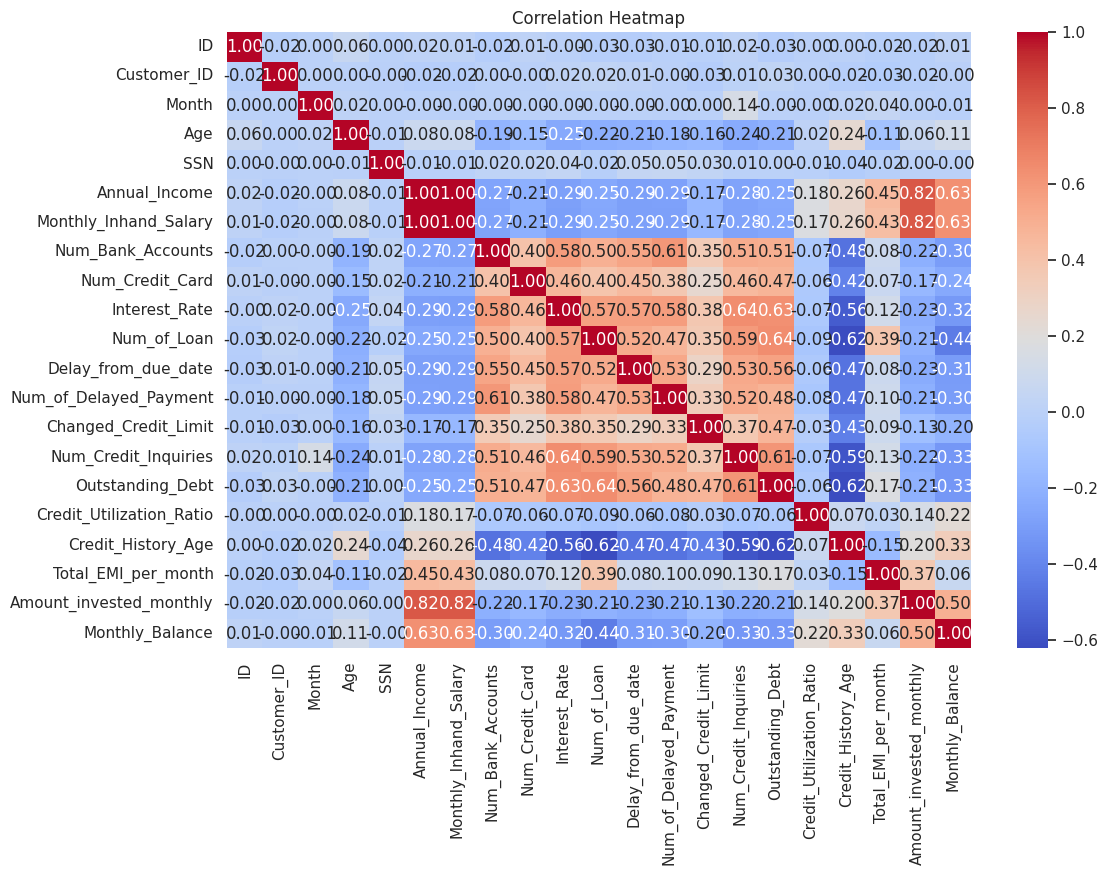

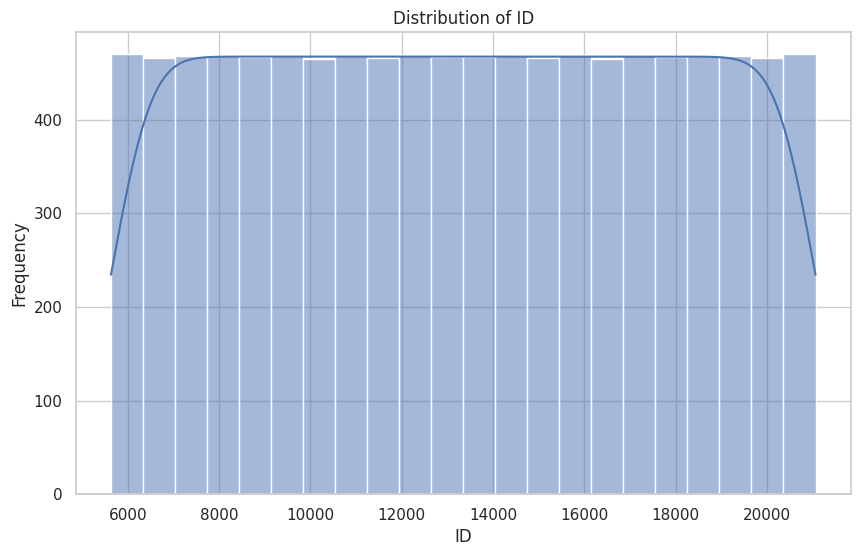

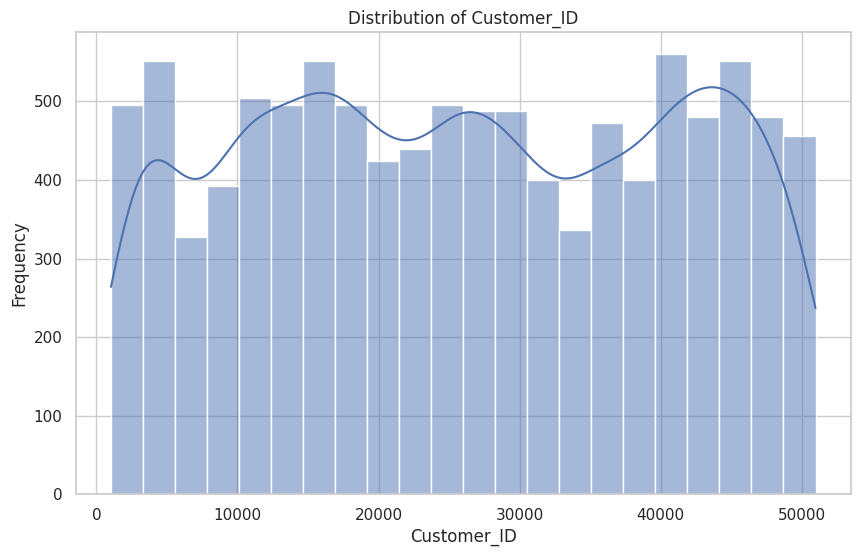

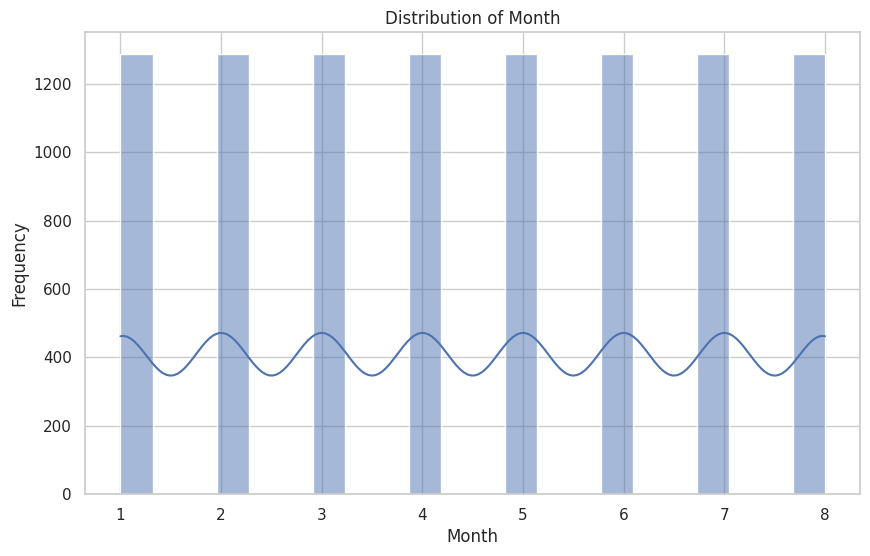

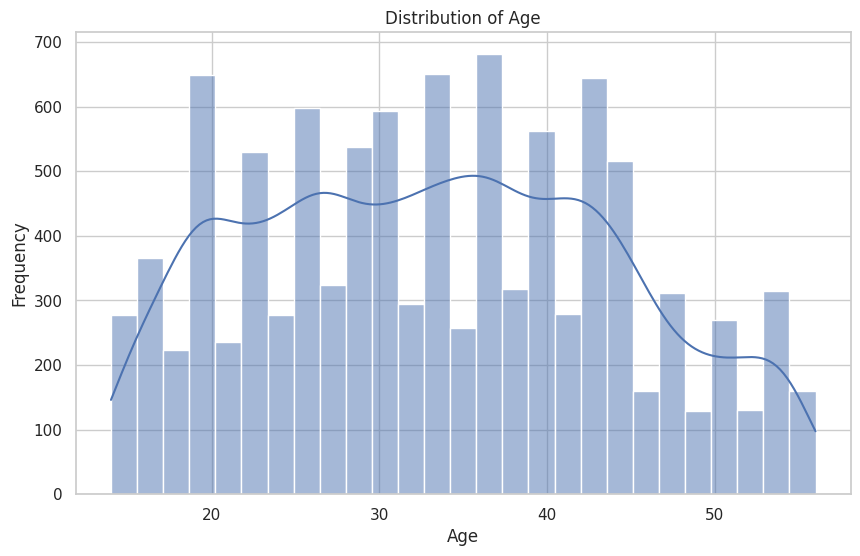

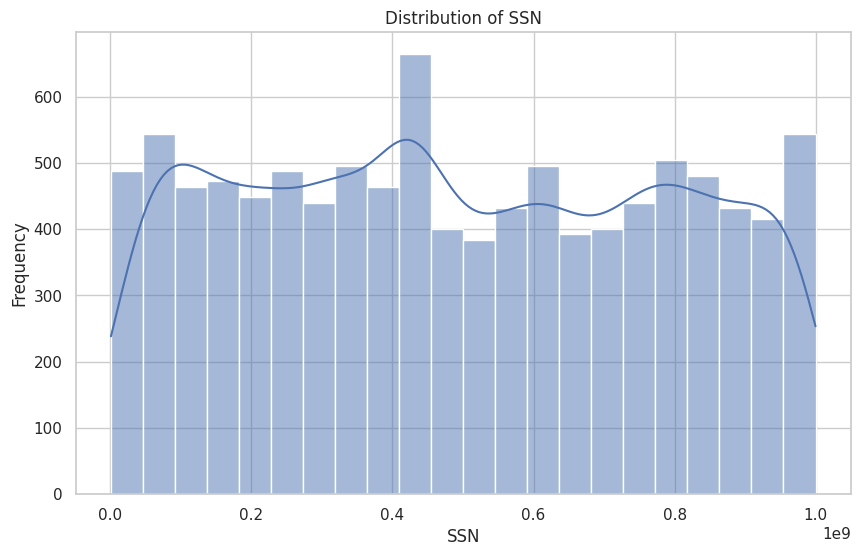

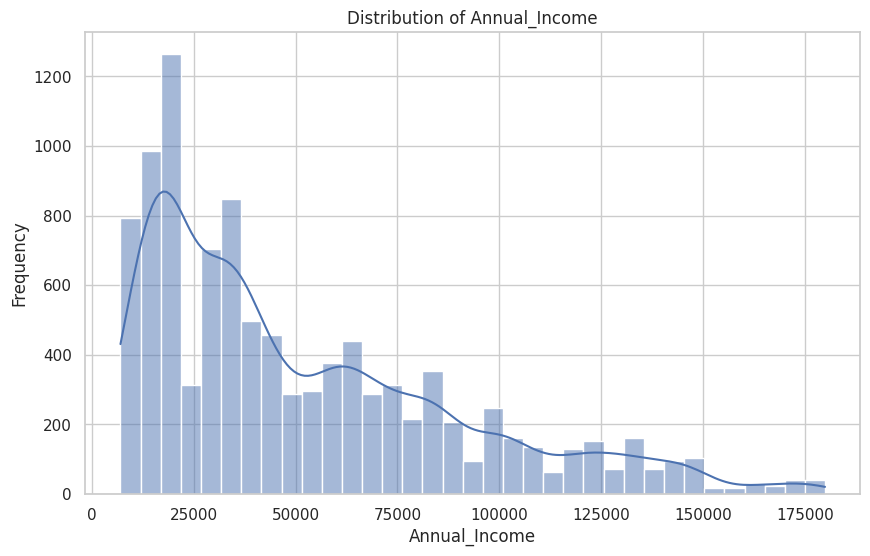

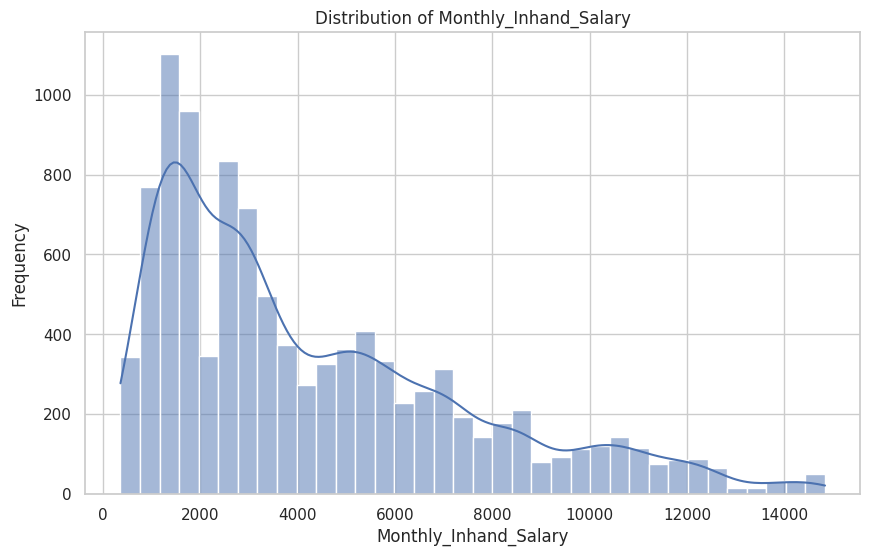

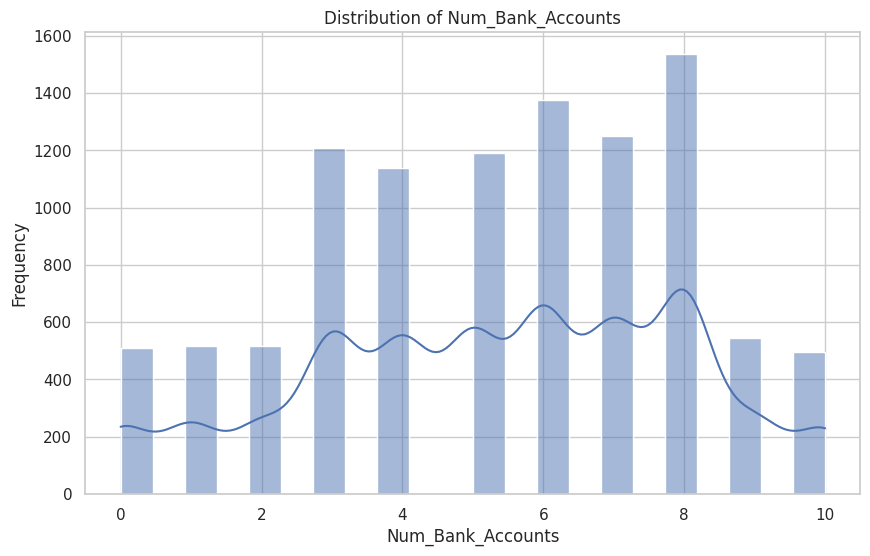

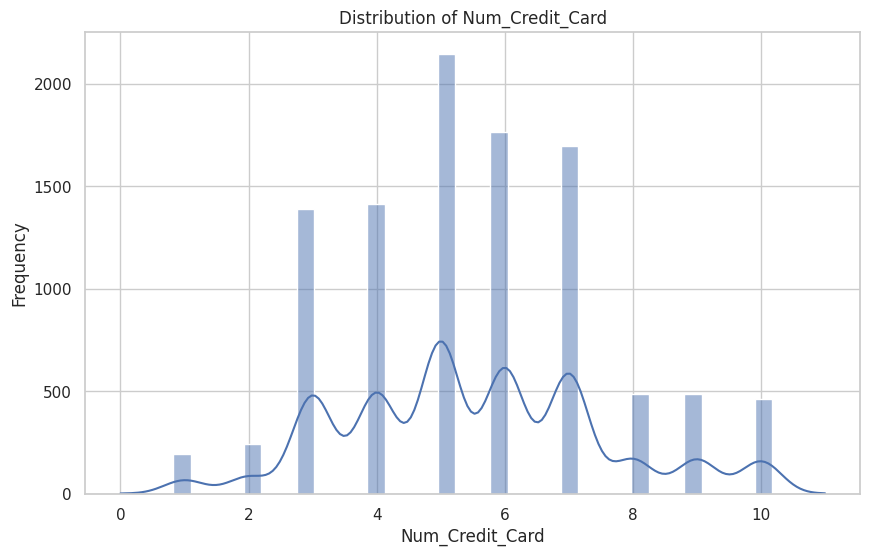

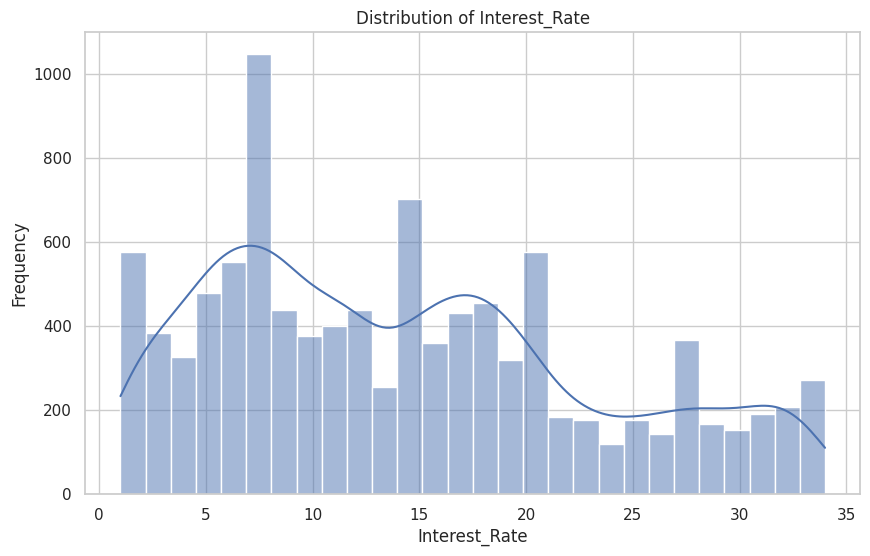

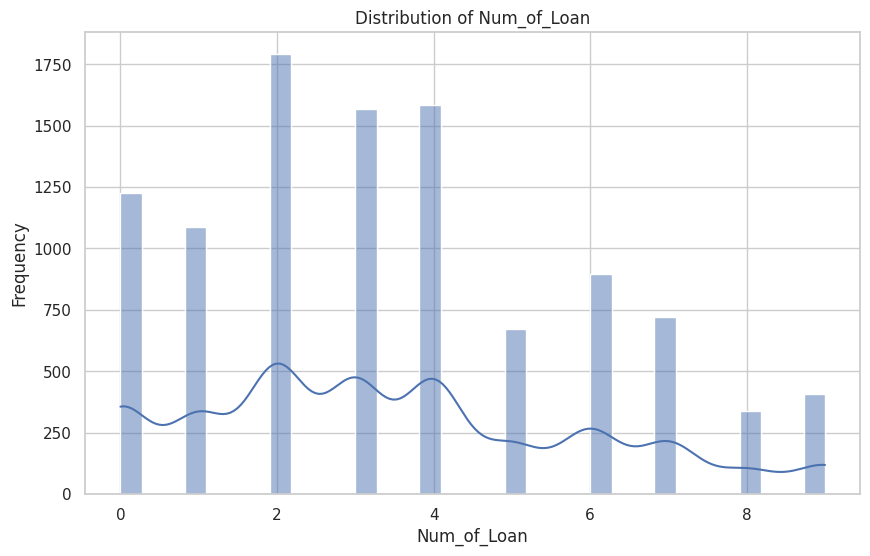

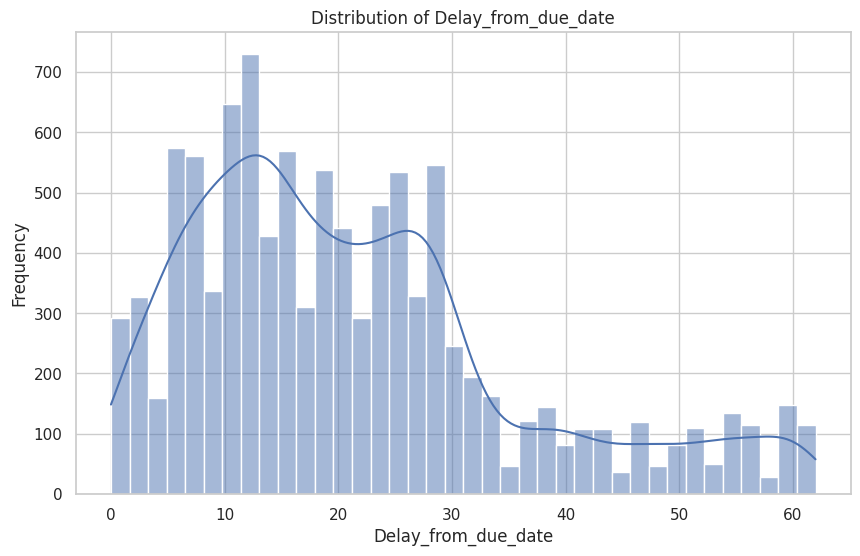

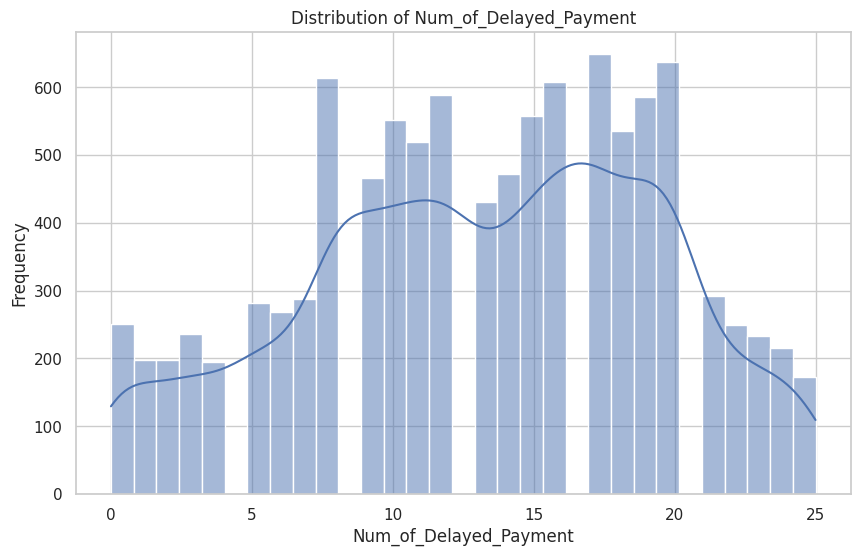

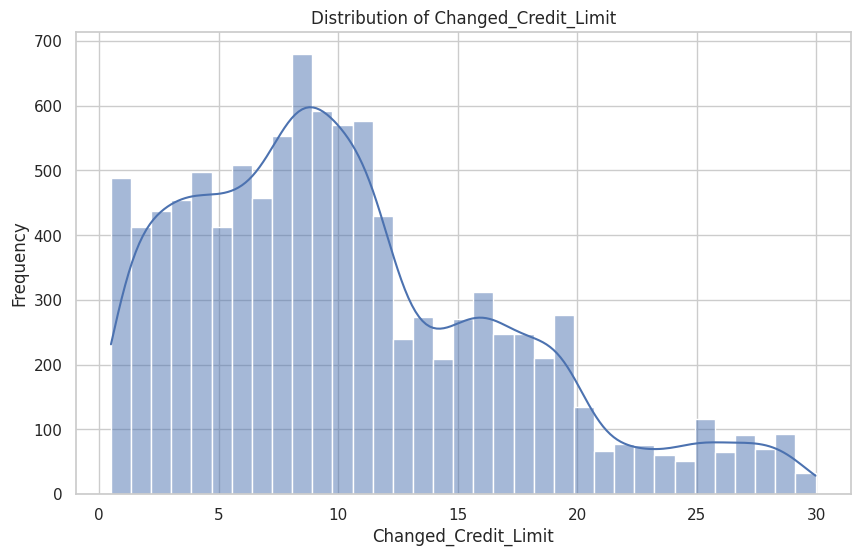

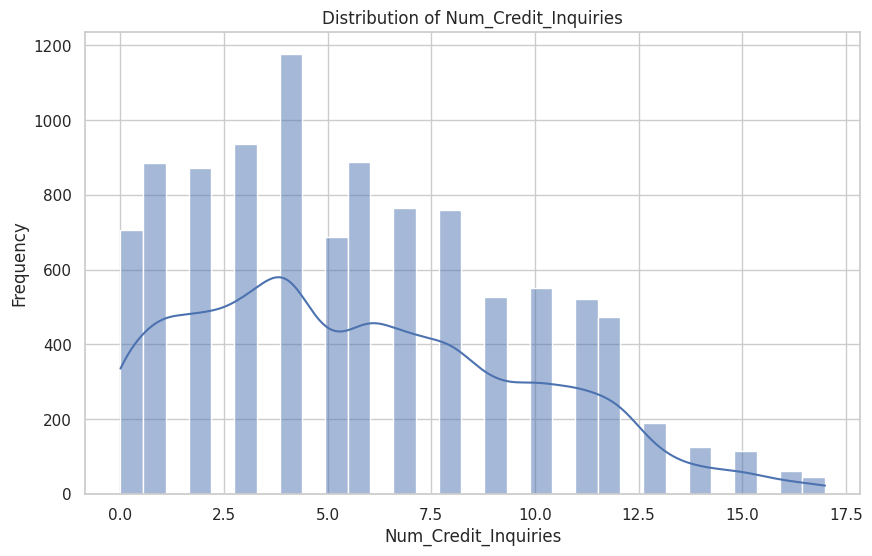

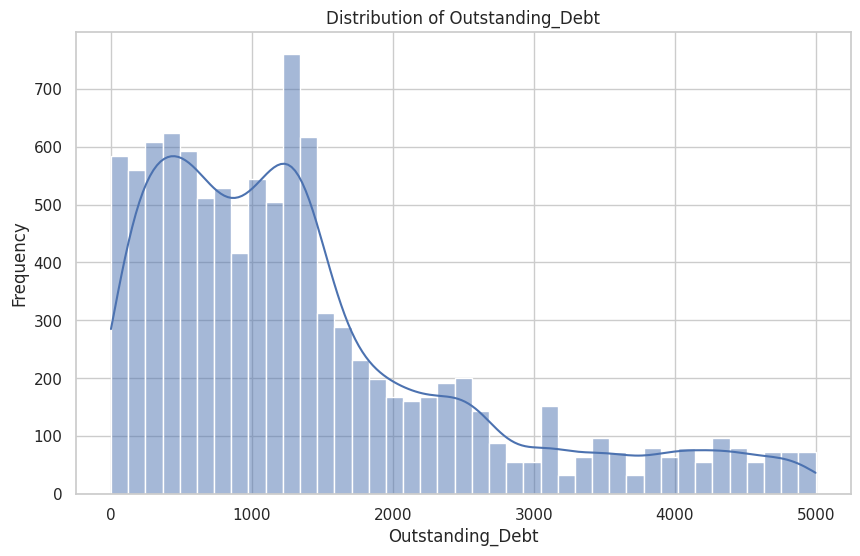

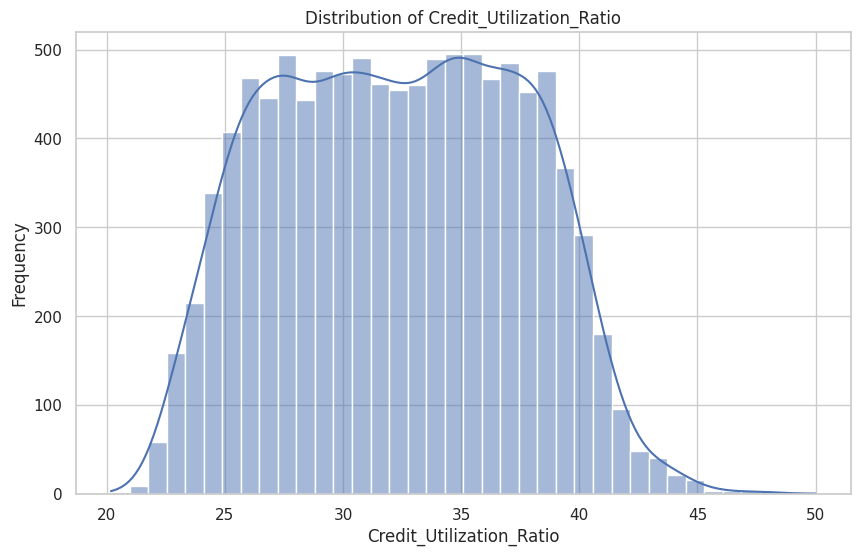

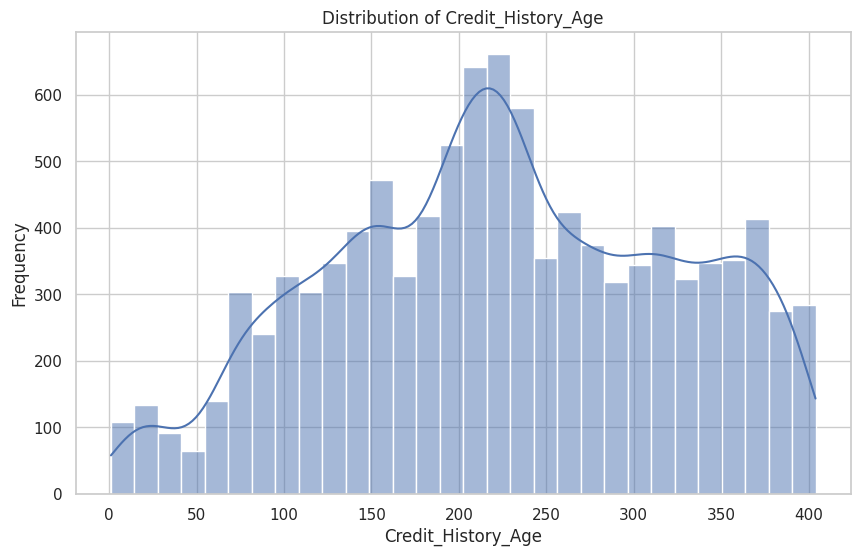

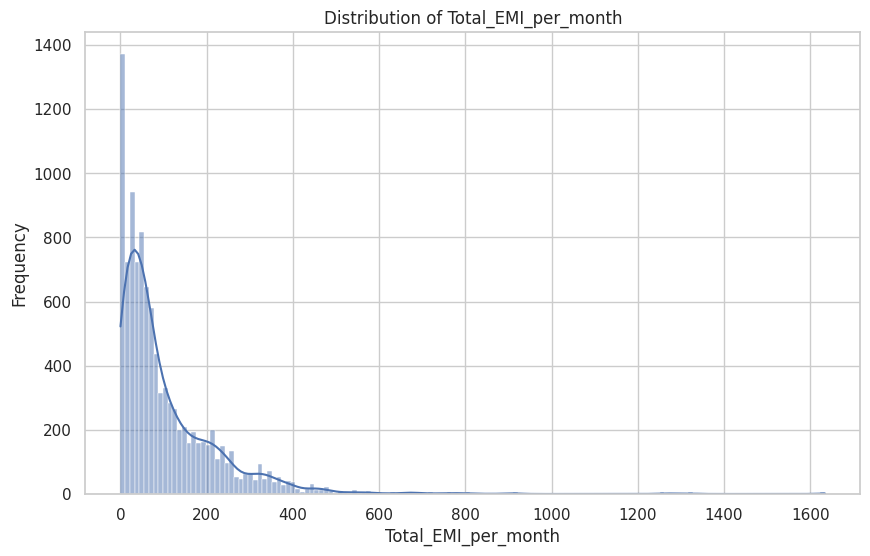

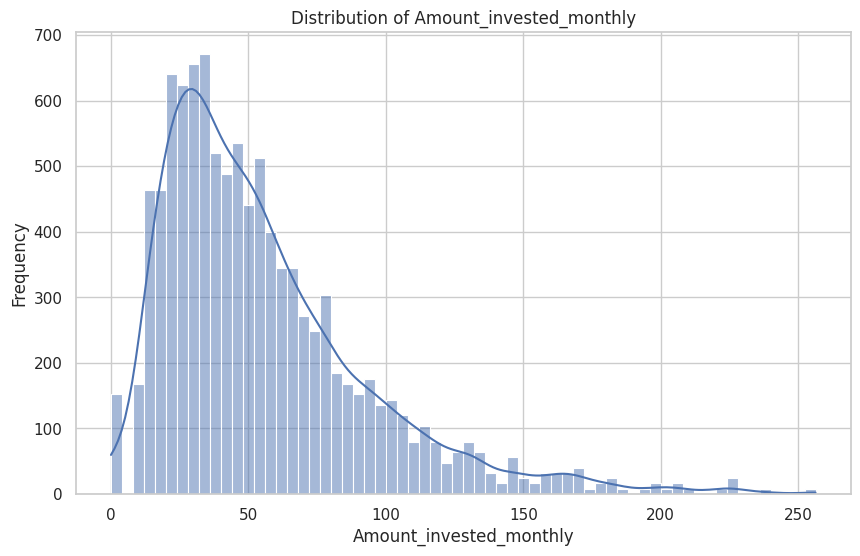

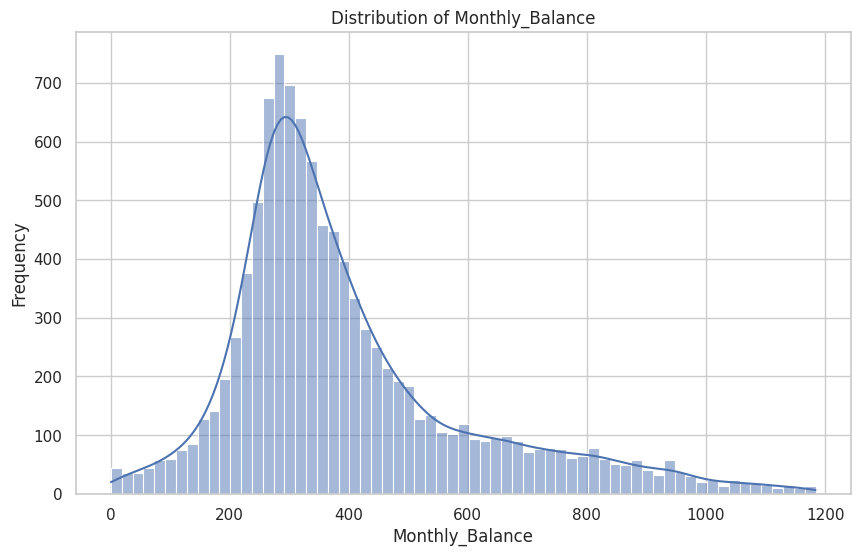

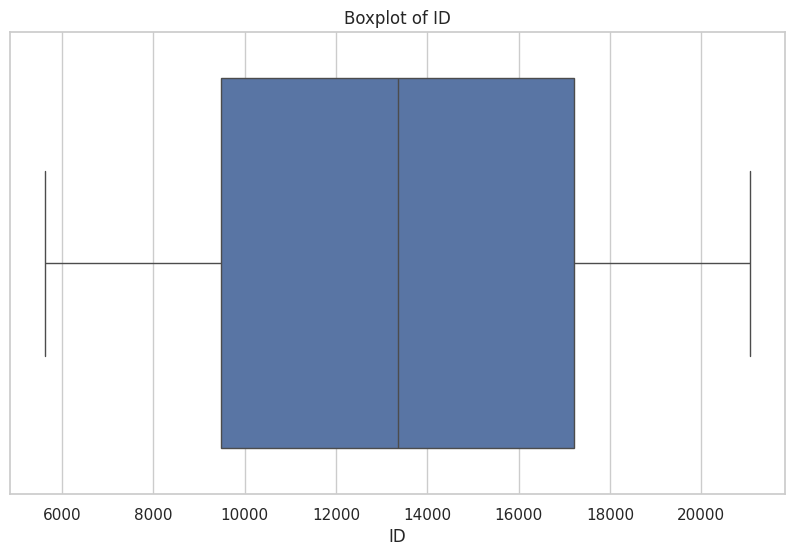

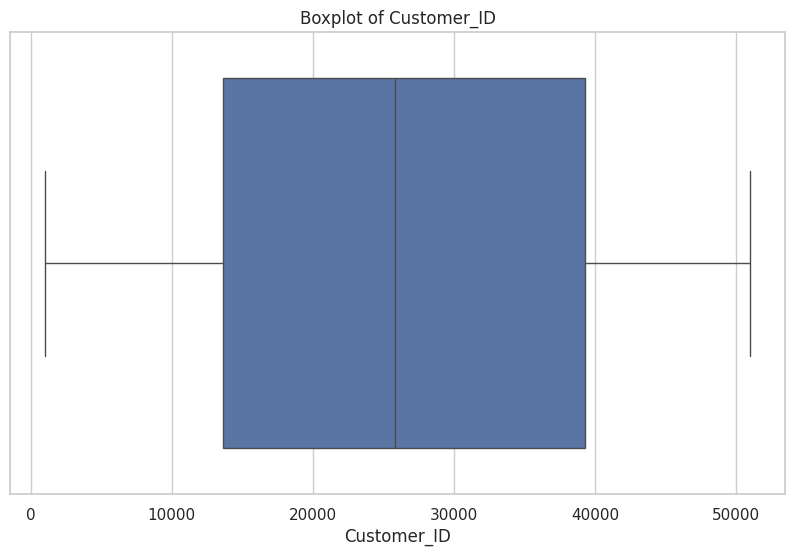

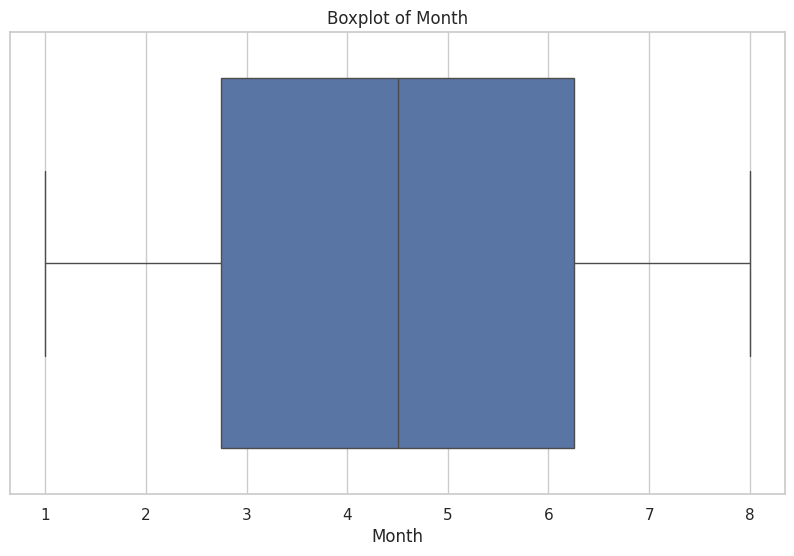

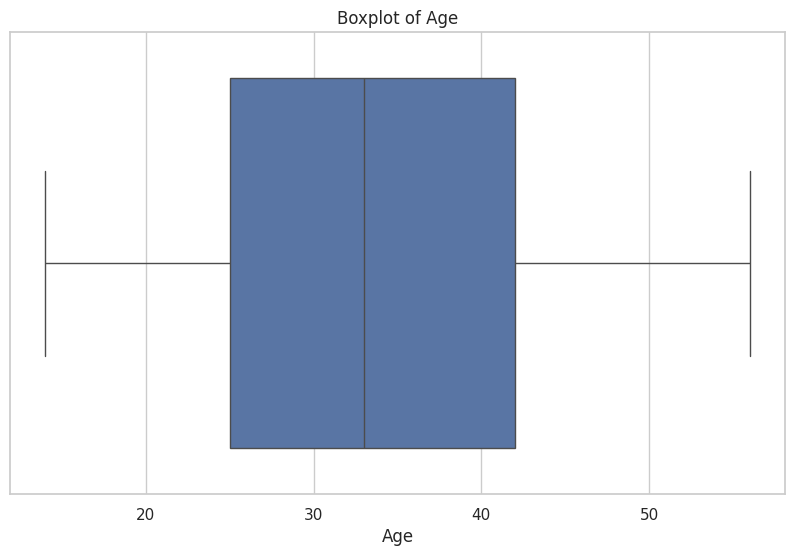

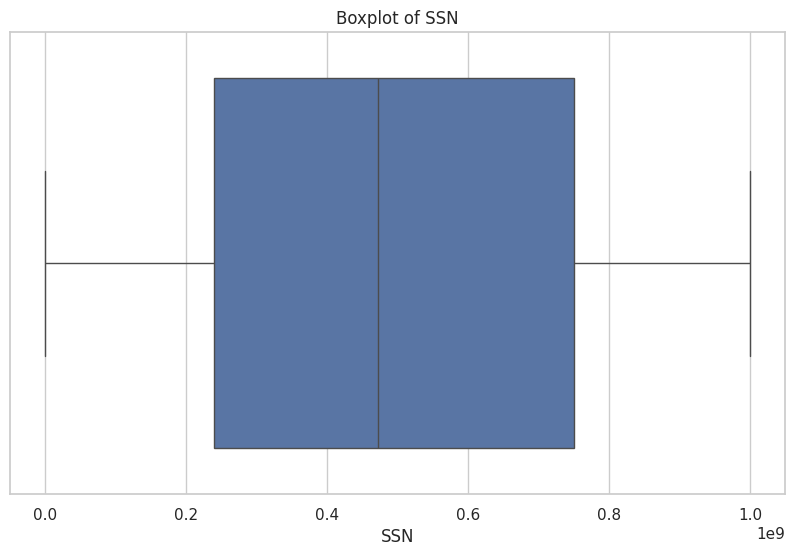

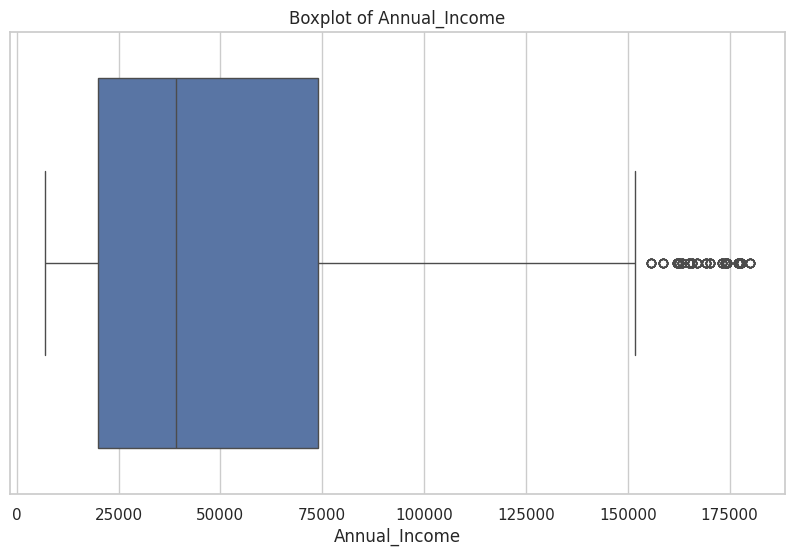

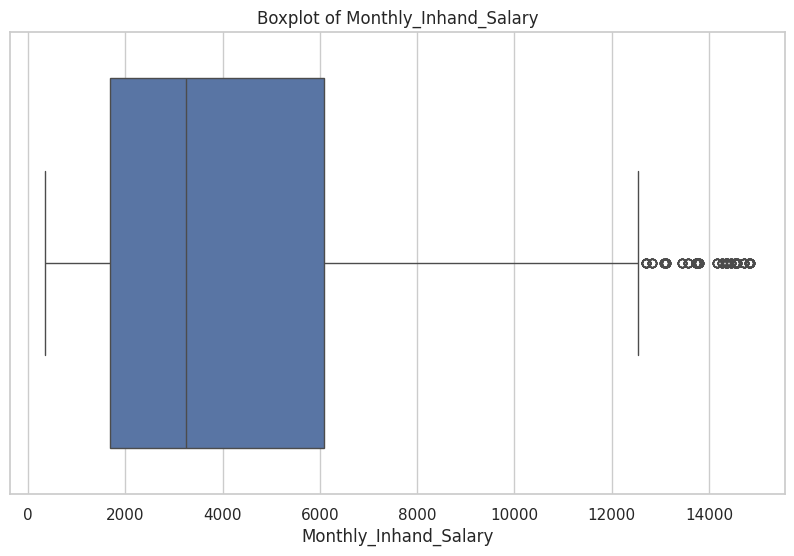

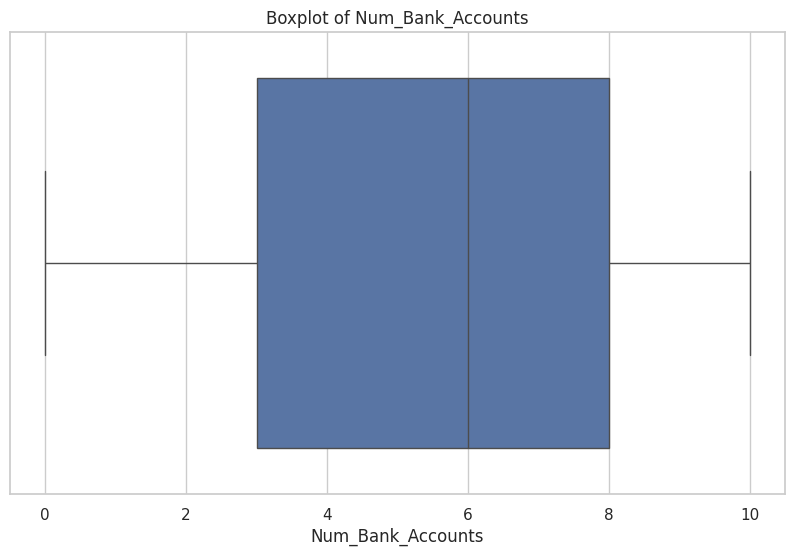

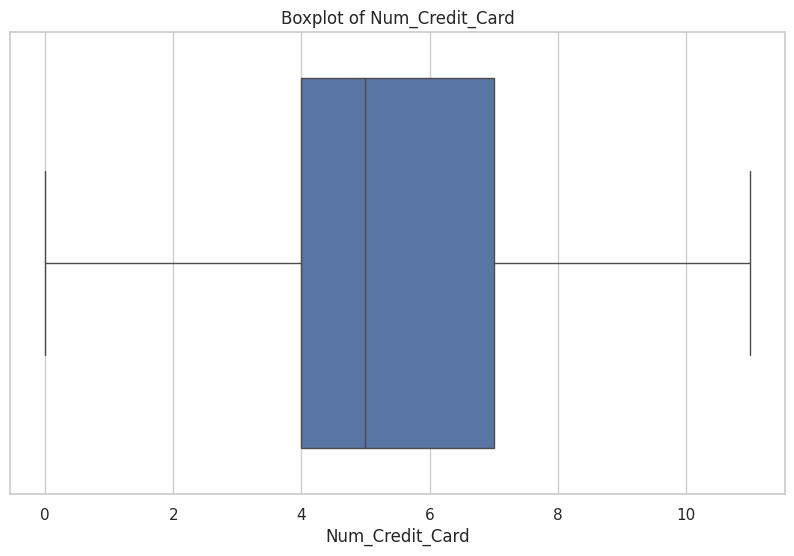

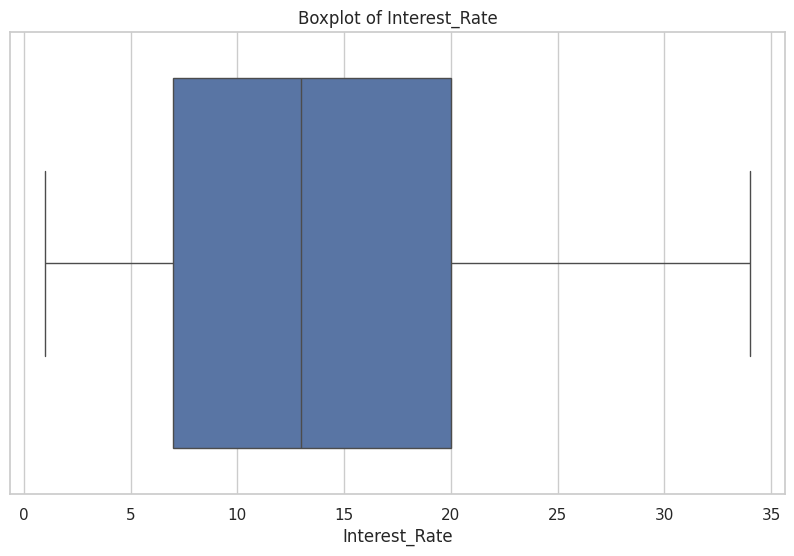

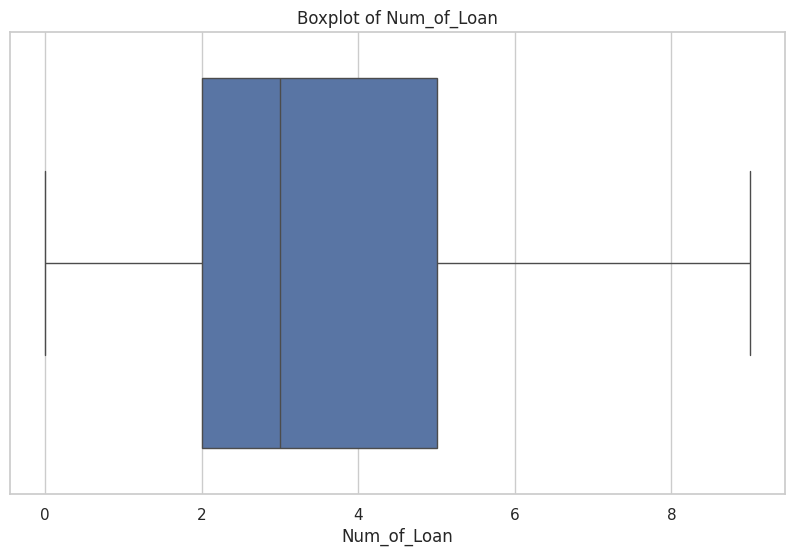

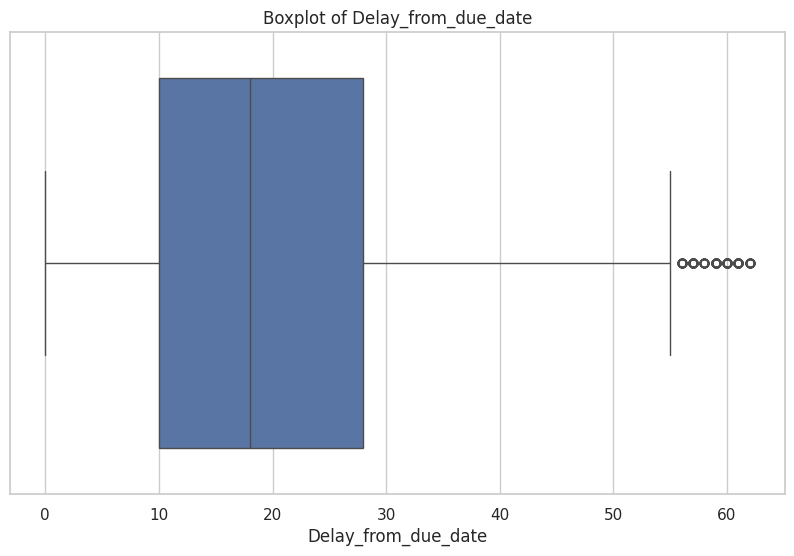

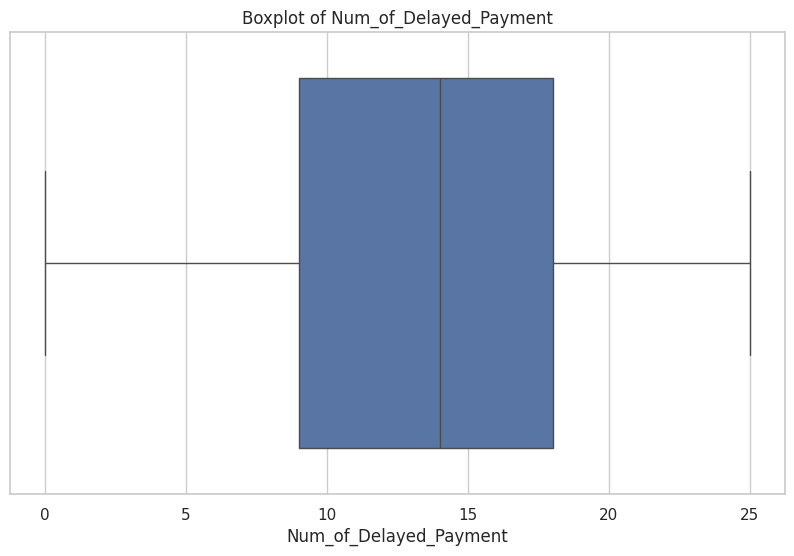

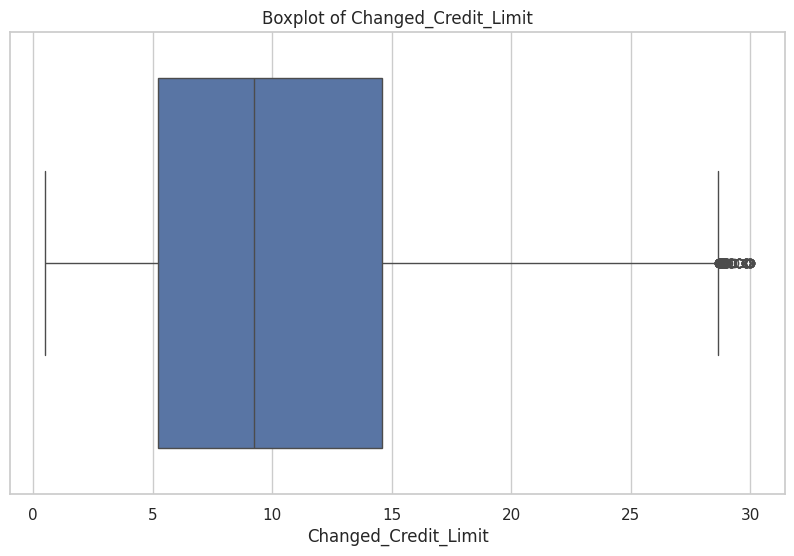

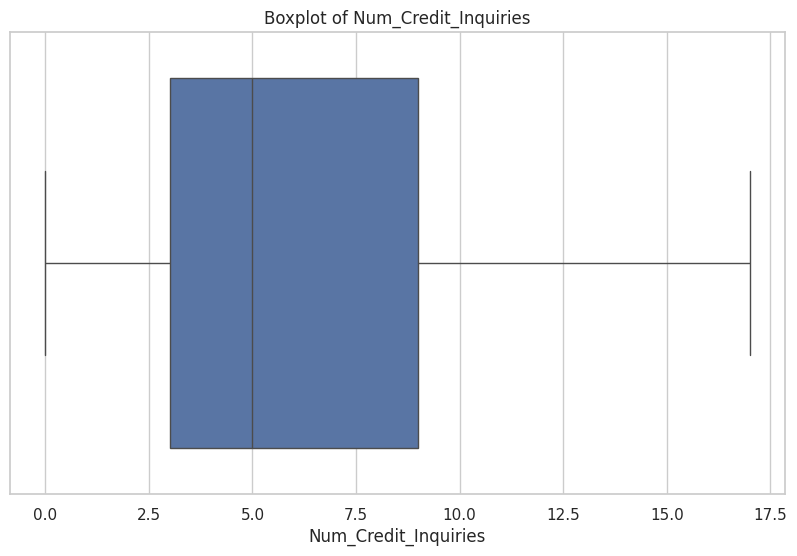

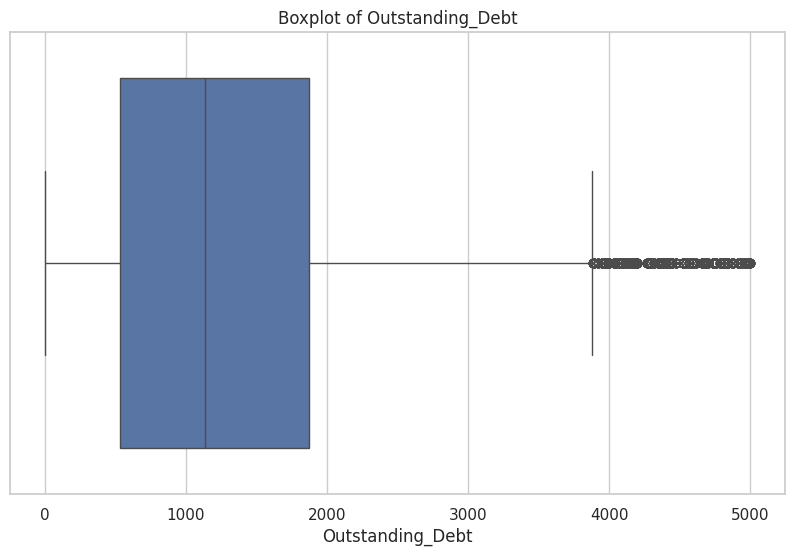

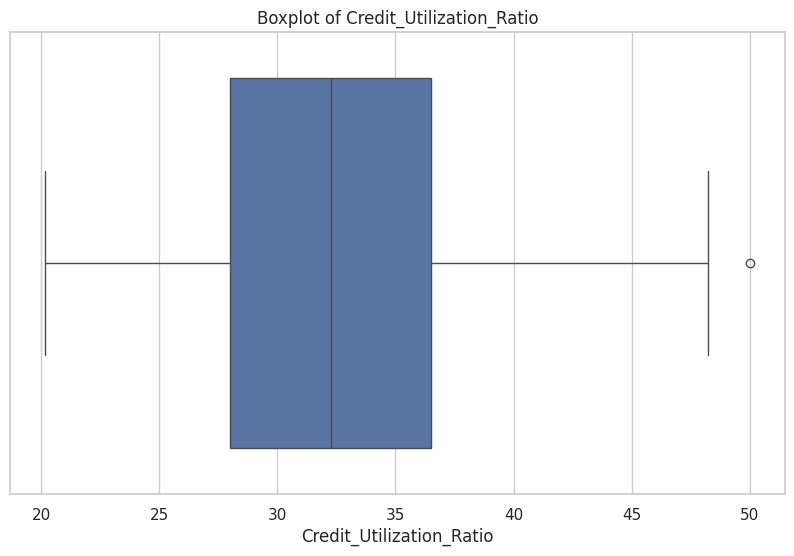

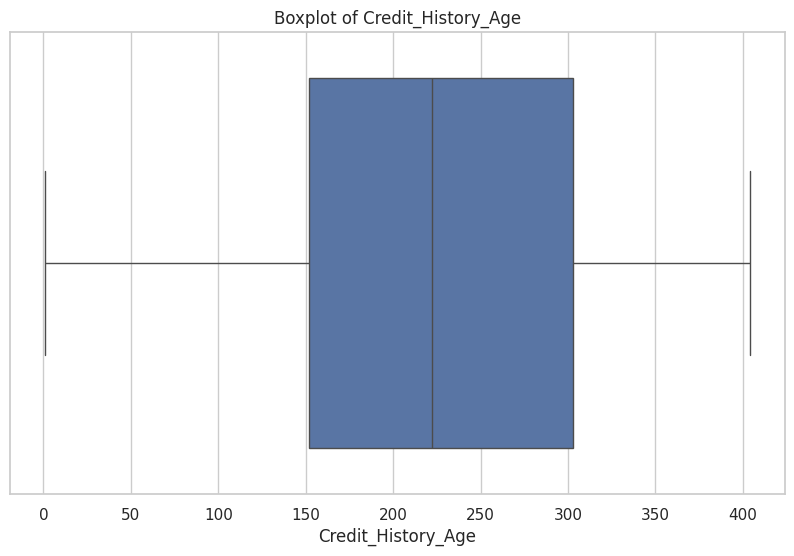

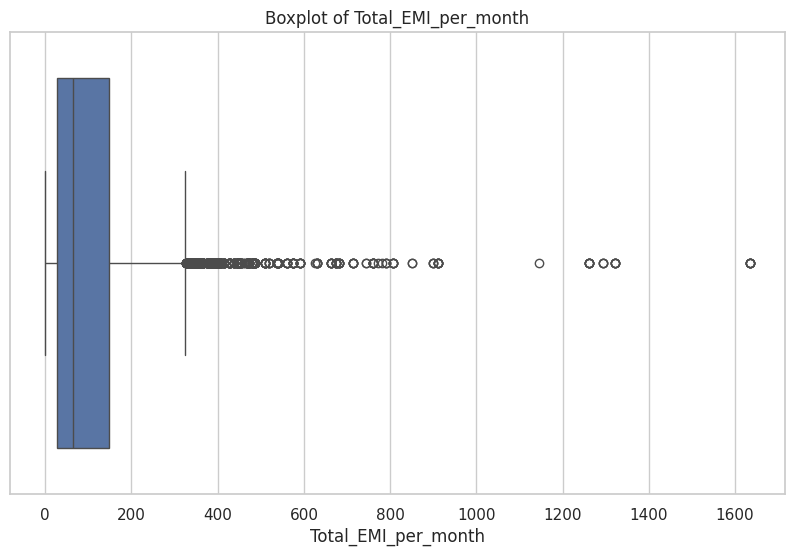

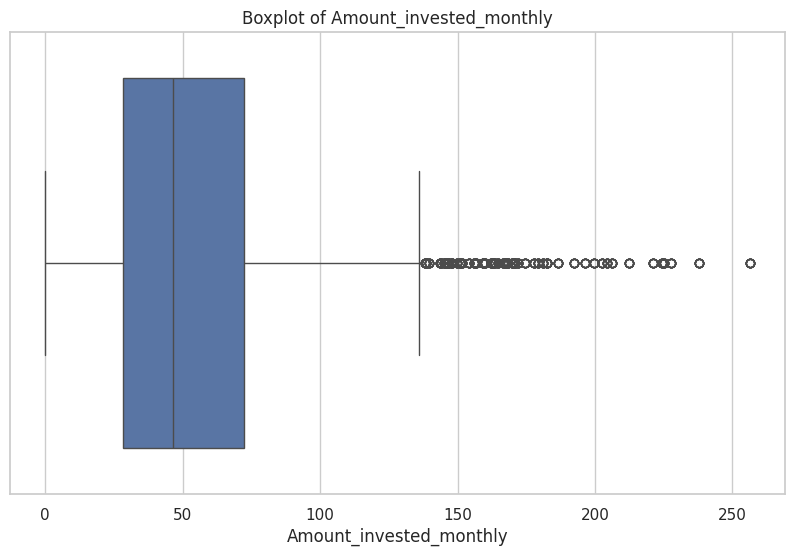

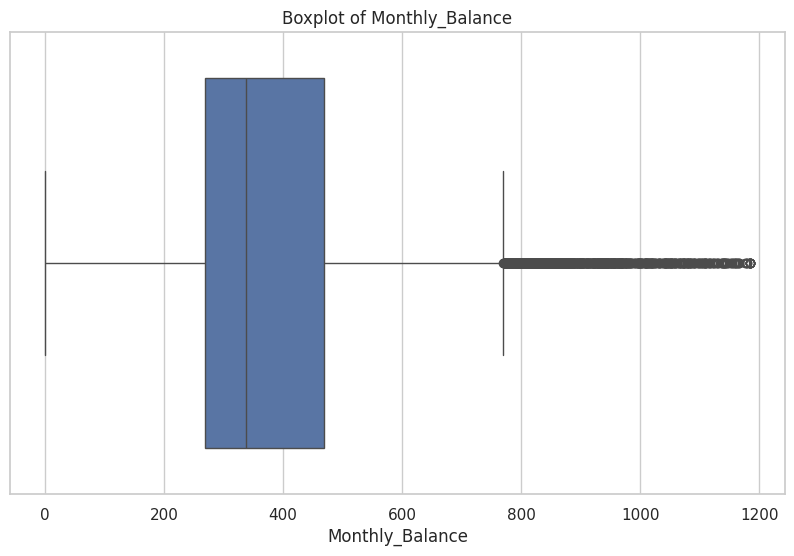

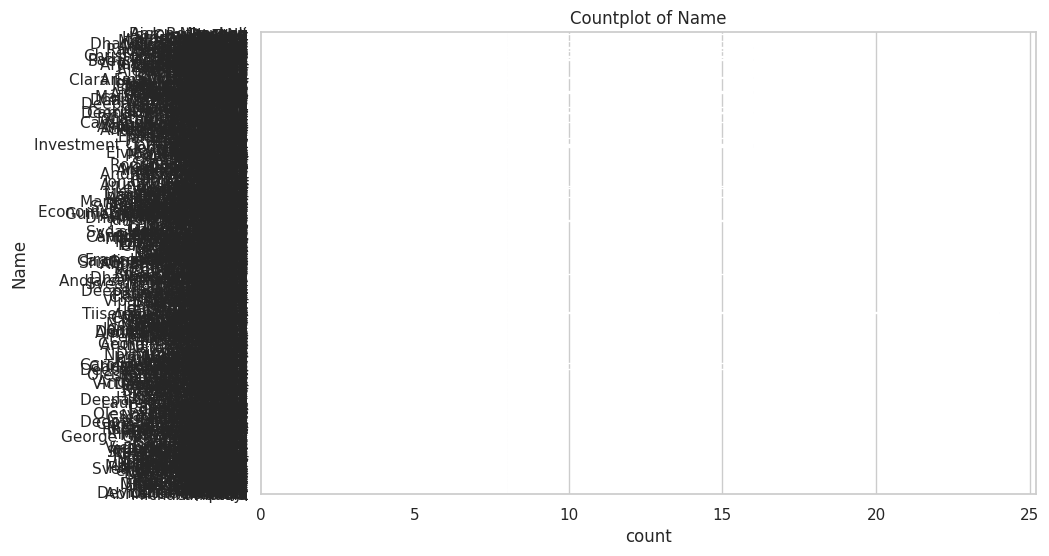

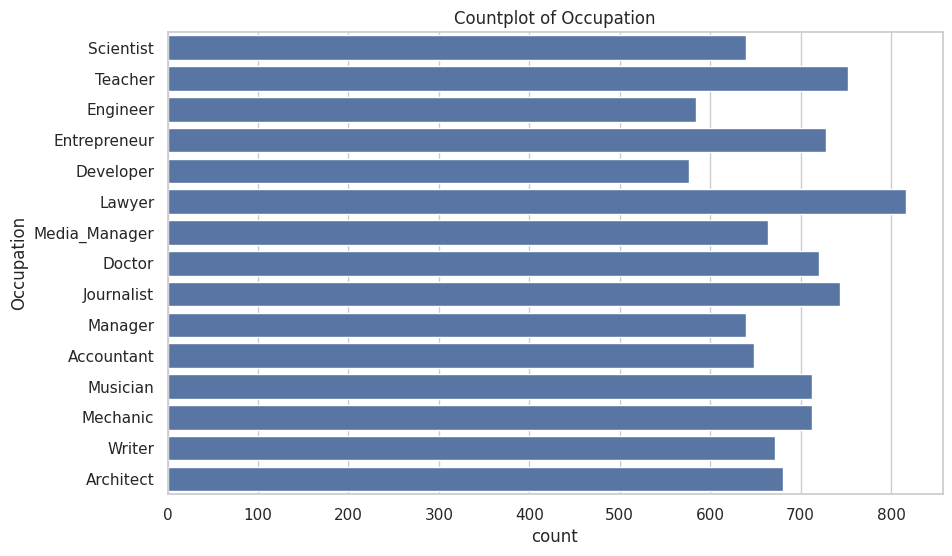

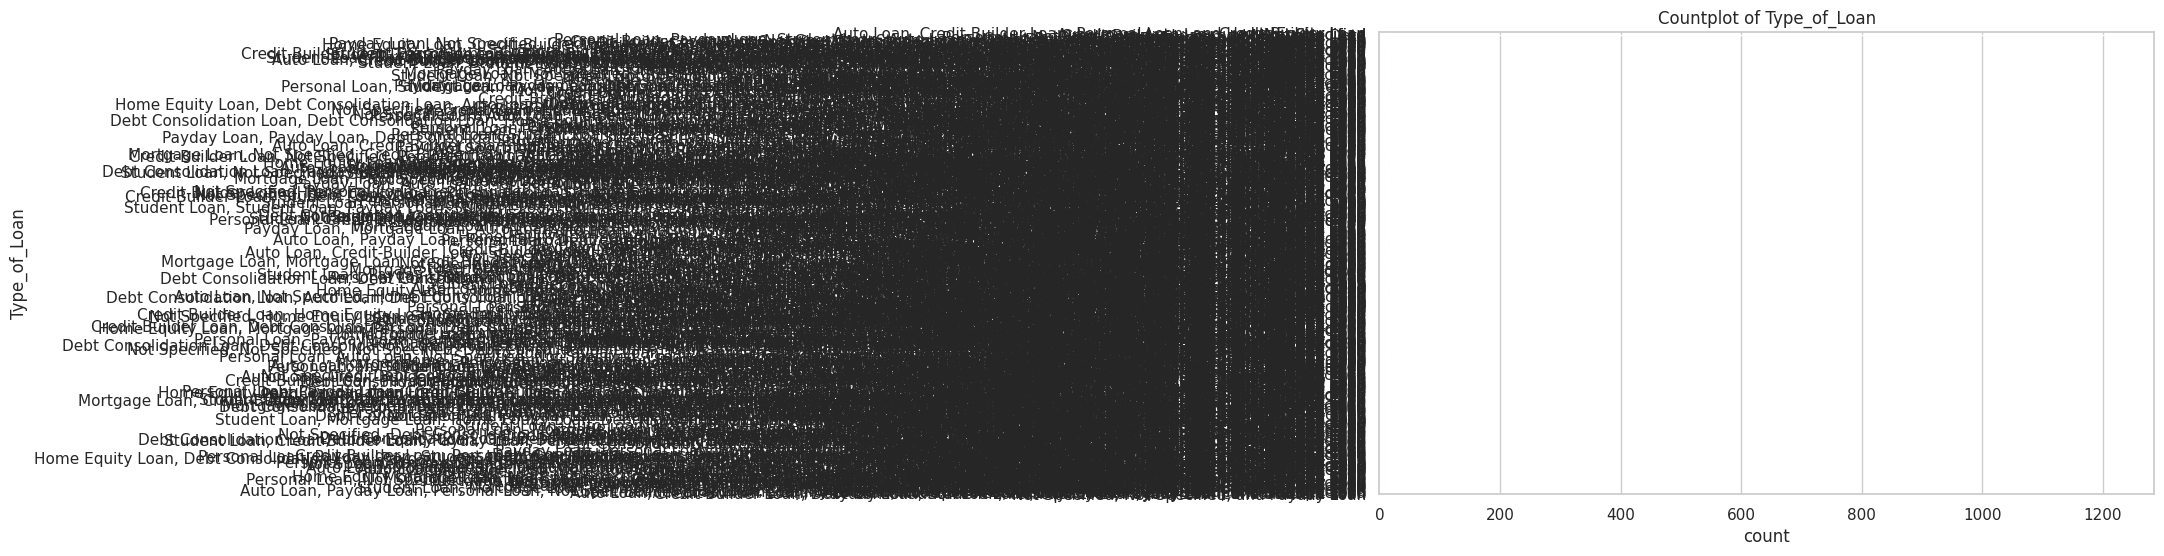

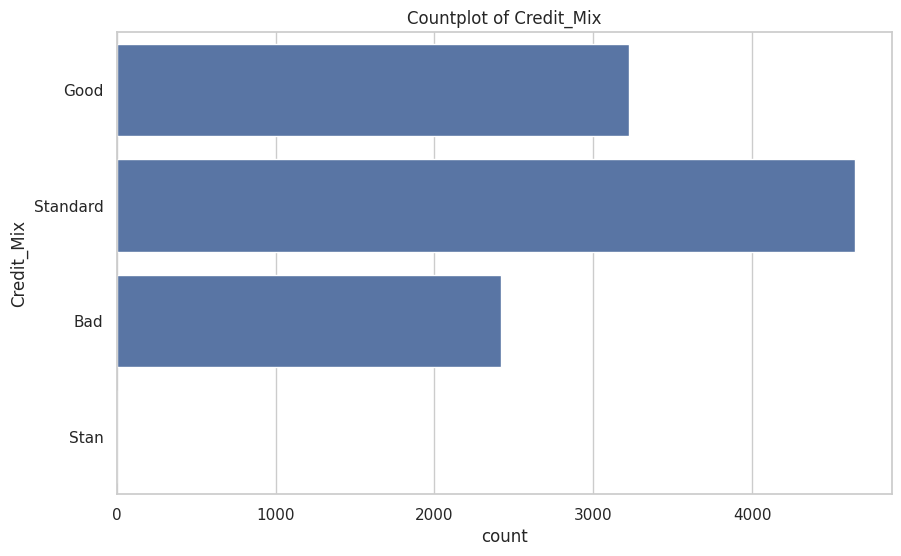

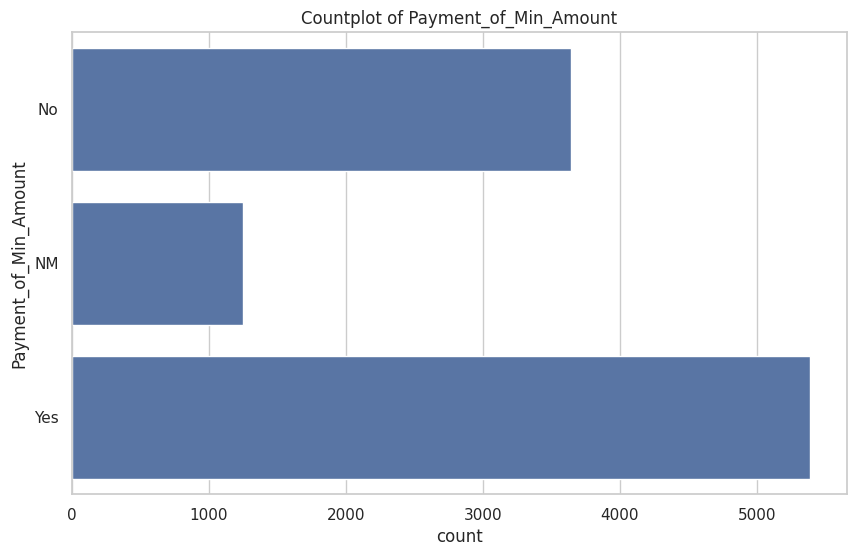

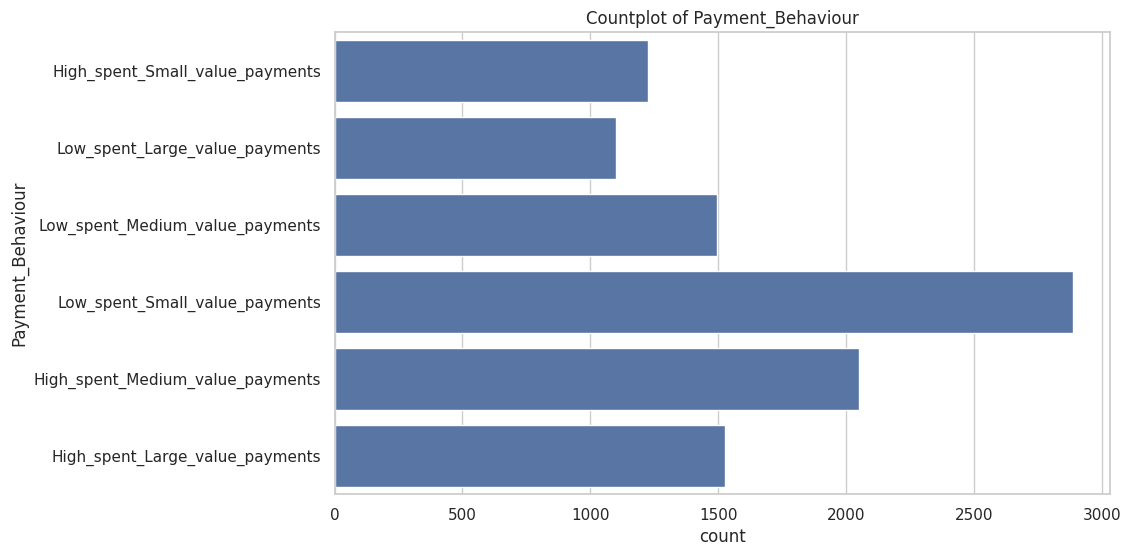

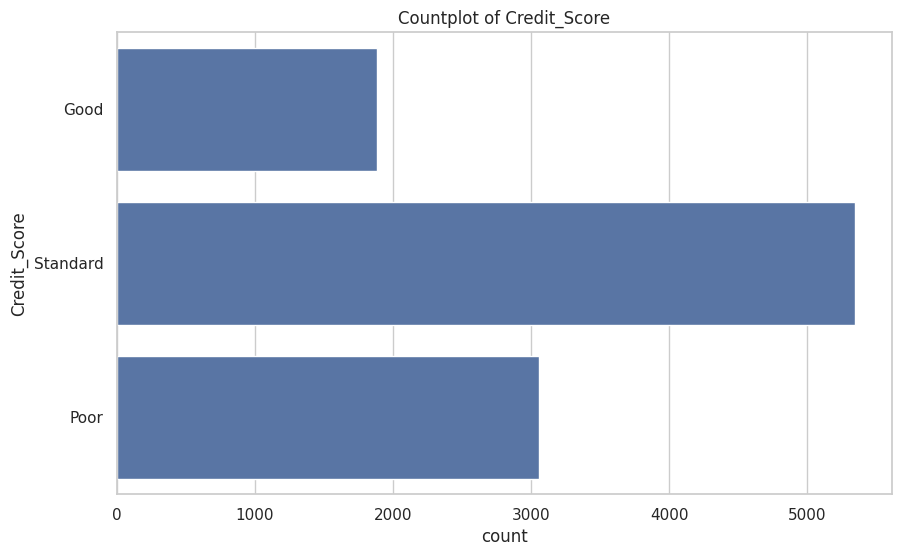

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset
df = pd.read_csv("dataset-2.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset shape
print("\nDataset Shape:", df.shape)

# Info about data types and nulls
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)

# Unique values in categorical columns (if any)
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Boxplots to detect outliers
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Countplots for categorical variables (if any)
for col in categorical_columns:
    sns.countplot(y=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()


Code to Build Credit Score Prediction Model

First 5 rows:
     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_H

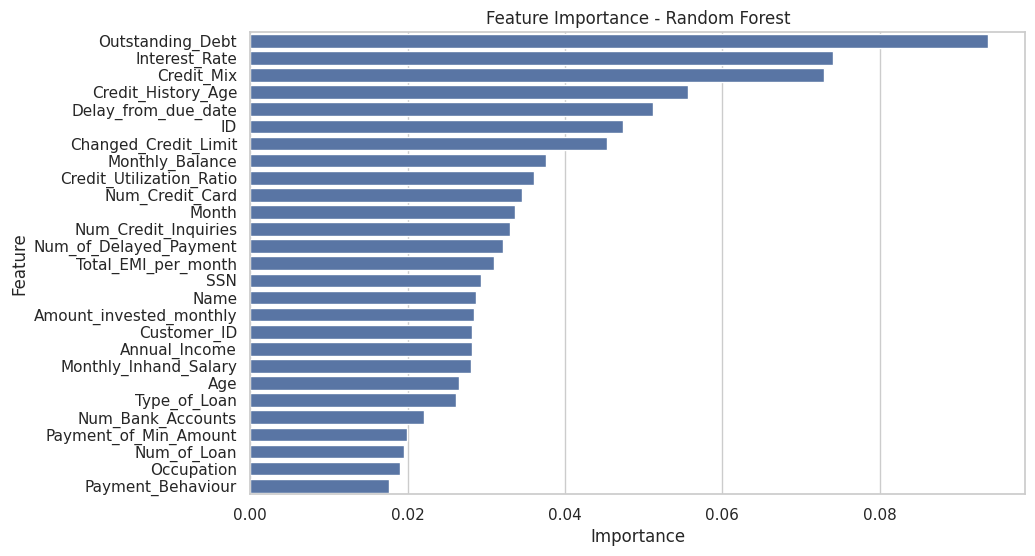

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("dataset-2.csv")

# View first few rows
print("First 5 rows:")
print(df.head())

# --- Step 1: Basic Cleaning ---
# Drop rows with null values (or handle differently)
df.dropna(inplace=True)

# --- Step 2: Encode categorical features ---
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- Step 3: Define target and features ---
# Try common names; adjust if needed
possible_targets = ['credit_score', 'Credit_Score', 'score', 'Score']
target_column = None
for col in df.columns:
    if col in possible_targets:
        target_column = col
        break

if not target_column:
    raise ValueError("No target column found. Please specify the column name representing credit score.")

X = df.drop(target_column, axis=1)
y = df[target_column]

# --- Step 4: Normalize numeric features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 5: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 6: Train Models ---

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- Step 7: Evaluation ---

def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# --- Optional: Feature Importance ---
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


✅ 1. Business Insight & Conclusion Cell

 📌 Business Insights and Conclusion

- **Objective Achieved**: We developed a machine learning model that predicts a customer’s credit score using features like income, payment behavior, and card usage patterns.
- **EDA Findings**:
  - Significant correlation between payment delays and poor credit scores.
  - Higher income levels are generally associated with better scores.
  - Outliers were present in payment behavior and credit card usage.
- **Model Insights**:
  - The **Random Forest Classifier** outperformed Logistic Regression with higher accuracy and better classification metrics.
  - Top contributing features included **payment history**, **income**, and **credit utilization**.
- **Business Recommendation**:
  - Use this model to pre-screen applicants for faster decision-making.
  - For customers predicted to have **low scores**, offer personalized credit counseling or secured products.
  - Incorporate real-time credit data and retrain model periodically to stay current.


✅ 2. Interactive Visualizations with Plotly & Dash

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff

# Correlation matrix
corr = df.corr(numeric_only=True).round(2)

# Heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.values,
    colorscale='Viridis'
)
fig.update_layout(title="Interactive Correlation Heatmap")
fig.show()


In [ ]:
for col in numeric_cols[:5]:  # show only top 5 to keep it readable
    fig = px.histogram(df, x=col, nbins=50, title=f"Distribution of {col}")
    fig.show()


In [ ]:
importance_df = importance_df.sort_values(by="Importance", ascending=False)
fig = px.bar(importance_df, x="Importance", y="Feature", orientation='h', title="Random Forest Feature Importance")
fig.show()


In [ ]:
pip install dash pandas scikit-learn plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from dash import Dash, dcc, html, Input, Output

# Load and clean data
df = pd.read_csv("dataset-2.csv")
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Infer target column
possible_targets = ['credit_score', 'Credit_Score', 'score', 'Score']
target_column = None
for col in df.columns:
    if col in possible_targets:
        target_column = col
        break

if not target_column:
    raise ValueError("Target column (credit score) not found. Rename it appropriately.")

# Train Random Forest for feature importance
X = df.drop(target_column, axis=1)
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Start Dash app
app = Dash(__name__)
app.title = "Credit Score EDA Dashboard"

app.layout = html.Div([
    html.H1("📊 PaisaBazaar Credit Score Dashboard"),

    html.Label("Select a numerical feature:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in X.columns],
        value=X.columns[0]
    ),

    dcc.Graph(id='histogram'),

    html.H2("🔍 Correlation Heatmap"),
    dcc.Graph(
        id='correlation-heatmap',
        figure=ff.create_annotated_heatmap(
            z=df.corr().values.round(2),
            x=list(df.corr().columns),
            y=list(df.corr().index),
            annotation_text=df.corr().values.round(2),
            colorscale='Viridis'
        )
    ),

    html.H2("🔥 Feature Importance (Random Forest)"),
    dcc.Graph(
        id='feature-importance',
        figure=px.bar(importance_df, x="Importance", y="Feature", orientation='h')
    )
])

@app.callback(
    Output('histogram', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_histogram(selected_feature):
    fig = px.histogram(df, x=selected_feature, nbins=50,
                       title=f"Distribution of {selected_feature}")
    return fig

if __name__ == '__main__':
    app.run(debug=True)



<IPython.core.display.Javascript object>